In [6]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

In [7]:
# y = w * x + b 함수
def myfunc(_x):
  w = 1.3 # 기울기
  b = 2.6 # y 절편.  점(0, 2.6)
  # x 절편은 점(-2, 0)이 됨.
  _y = w * _x + b
  noise = random.random() * 0.01    # Noise
  return _y + noise

In [8]:
# random.random() -- 0.0 ~ 1.0
NUM_DATA = 100          # 데이터 갯수
XVALUE = 5              # X값의 범위 (0.0 ~ 5.0)
# type: python list
xlist = [random.random() * XVALUE for i in range(NUM_DATA)]
xlist.sort()            # sorting
ylist = [myfunc(x) for x in xlist]
print('xlist :',xlist[:10])
print('ylist :',ylist[:10])
print('type(xlist) :', type(xlist))
print('type(ylist) :', type(ylist))

xlist : [0.01061207144537557, 0.0364075796601554, 0.09830239694880893, 0.1023133567728074, 0.10930384521262049, 0.1227275384852522, 0.14257606125786304, 0.15351732886692115, 0.19145026057048264, 0.19822664847107707]
ylist : [2.6172739710649267, 2.6486558306846453, 2.7360563698813407, 2.7386489283226507, 2.7440263591171696, 2.760137888142488, 2.790963979375193, 2.8007710494577185, 2.85419697412984, 2.8626396010068986]
type(xlist) : <class 'list'>
type(ylist) : <class 'list'>


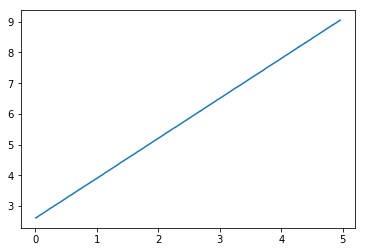

In [9]:
# actual data 산점도
fig, ax = plt.subplots()
ax.plot(xlist, ylist, label='actual')
plt.show()

In [10]:
# type 변환 python list -> numpy ndarray
# type: numpy ndarray
xlist = np.array(xlist)
ylist = np.array(ylist)
print('xlist.shape :',xlist.shape)  # shape ==  (10,)
print('ylist.shape :',ylist.shape)  # shape ==  (10,)
## shape이 해깔리는 과정인데 nxm 행렬만들어 주는것일듯 

xlist.shape : (100,)
ylist.shape : (100,)


In [11]:
# tensor 에 맞추기 위해 reshape
xlist = xlist.reshape((NUM_DATA, 1))  # shape ==  (10,1)
ylist = ylist.reshape((NUM_DATA, 1))  # shape ==  (10,1)
print('xlist.shape :', xlist.shape)
print('ylist.shape :', ylist.shape)

xlist.shape : (100, 1)
ylist.shape : (100, 1)


In [12]:
# placeholder tensor 안에 데이터를 받는 공간 (포멧, 행렬, 이름)
X = tf.placeholder(tf.float32, [None, 1], name='inputPlace')
y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([1,1], -1, 1), name='weight')
b = tf.Variable(tf.random_normal([1], -1, 1), name='bias')
O = tf.matmul(X, W) + b   # [1,1]행렬 x [1,1]행렬 + [1]

In [13]:
# 손실 함수 
## array를받아서 값을 리턴하면 reduce가 보통 붙는다.
cost_function = tf.reduce_mean(tf.square(O - y))
# 옵티마이저(GradientDesecent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
training = optimizer.minimize(cost_function)

# 옵티마이저(Adam)
optimizer2 = tf.train.AdamOptimizer(learning_rate=0.1)
training2 = optimizer.minimize(cost_function)

print('X : ', X.name)

X :  inputPlace:0


In [16]:
# loss list
see_loss_summary = []           # Record loss values for plot
see_loss_summary2 = []          # Record loss values for plot

In [22]:
#1. constant = 상수
#2. placeholder = input값
#3. Variable = 변수
#4. operator 함수

# Session 시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(1000):
  res_training, cost_val  = sess.run([training, cost_function],
                                     feed_dict={X: xlist, y:ylist})
  if cost_val < 0.00001:
    break
    

  if i % 10 == 0:
    see_loss = sess.run([cost_function],
                        feed_dict={X: xlist, y: ylist})
    res_o, res_w, res_b = sess.run([O, W, b], feed_dict={X: xlist, y: ylist})

    print('LOSS', see_loss, end=' ')
    print('W', res_w, 'bias', res_b)

    see_loss_summary.append(see_loss)

print('W shape', res_w.shape)
print('B shape', res_b.shape)
print('O shape', res_o.shape)

LOSS [42.307899] W [[ 4.35510254]] bias [-0.27556622] Tensor("strided_slice_35:0", shape=(1,), dtype=float32)
LOSS [1.3300695] W [[ 2.01403117]] bias [ 0.71414304] Tensor("strided_slice_36:0", shape=(1,), dtype=float32)
LOSS [0.35821283] W [[ 1.63166595]] bias [ 1.53836203] Tensor("strided_slice_37:0", shape=(1,), dtype=float32)
LOSS [0.10961872] W [[ 1.47958982]] bias [ 2.0127635] Tensor("strided_slice_38:0", shape=(1,), dtype=float32)
LOSS [0.033612136] W [[ 1.39927638]] bias [ 2.27661943] Tensor("strided_slice_39:0", shape=(1,), dtype=float32)
LOSS [0.010310099] W [[ 1.35506046]] bias [ 2.42279482] Tensor("strided_slice_40:0", shape=(1,), dtype=float32)
LOSS [0.0031658898] W [[ 1.33059442]] bias [ 2.50373816] Tensor("strided_slice_41:0", shape=(1,), dtype=float32)
LOSS [0.0009755221] W [[ 1.31704855]] bias [ 2.54855776] Tensor("strided_slice_42:0", shape=(1,), dtype=float32)
LOSS [0.0003039726] W [[ 1.30954802]] bias [ 2.57337475] Tensor("strided_slice_43:0", shape=(1,), dtype=float

In [11]:
sess.run(tf.global_variables_initializer())
for i in range(1000):
  res_training2, cost_val2 = sess.run([training2, cost_function],
                                    feed_dict={X: xlist, y: ylist})
  if cost_val2 < 0.00001:
    break

  if i % 10 == 0:
    see_loss2 = sess.run([cost_function],
                        feed_dict={X: xlist, y: ylist})
    res_o, res_w, res_b = sess.run([O, W, b], feed_dict={X: xlist, y: ylist})

    print('LOSS2', see_loss2, end=' ')
    print('W', res_w, 'bias', res_b)

    see_loss_summary2.append(see_loss2)

LOSS2 [78.199005] W [[ 4.52454042]] bias [ 1.53936839]
LOSS2 [52.598019] W [[ 3.84053087]] bias [ 2.10548544]
LOSS2 [35.452286] W [[ 3.32026815]] bias [ 2.42741823]
LOSS2 [23.92421] W [[ 2.91859341]] bias [ 2.60328531]
LOSS2 [16.155691] W [[ 2.60448527]] bias [ 2.69291258]
LOSS2 [10.913909] W [[ 2.35622406]] bias [ 2.73258543]
LOSS2 [7.3744664] W [[ 2.15829682]] bias [ 2.74415159]
LOSS2 [4.9834847] W [[ 1.99939573]] bias [ 2.74063206]
LOSS2 [3.3679593] W [[ 1.87112427]] bias [ 2.72967696]
LOSS2 [2.2762458] W [[ 1.76713371]] bias [ 2.71567988]
LOSS2 [1.5384413] W [[ 1.6825459]] bias [ 2.70108485]
LOSS2 [1.0397969] W [[ 1.61356473]] bias [ 2.6871748]
LOSS2 [0.70278025] W [[ 1.55720043]] bias [ 2.67455649]
LOSS2 [0.4749997] W [[ 1.51107681]] bias [ 2.66345072]
LOSS2 [0.32104692] W [[ 1.47329032]] bias [ 2.65386701]
LOSS2 [0.2169944] W [[ 1.44230783]] bias [ 2.64570785]
LOSS2 [0.14666638] W [[ 1.41688716]] bias [ 2.63882637]
LOSS2 [0.099132031] W [[ 1.39601946]] bias [ 2.63306141]
LOSS2 [0

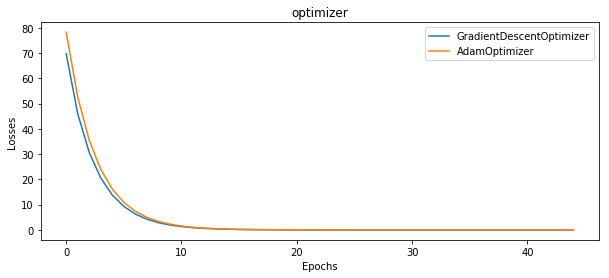

In [12]:
# Plot the accuracy and cost summaries
f, ax1 = plt.subplots(1, 1, sharex=True, figsize=(10,4))

ax1.plot(see_loss_summary[0:],  label='GradientDescentOptimizer')    # GradientDescentOptimizer
ax1.plot(see_loss_summary2[0:], label='AdamOptimizer')                 # green AdamOptimizer
ax1.set_title('optimizer')

plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()